
importing library


In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

data training preprocessing

In [7]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'DataSet2/data_split/training',
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    interpolation="bilinear",
    follow_links=False
)


Found 10817 files belonging to 2 classes.


In [16]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'DataSet2/data_split/validation',
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    interpolation="bilinear",
    follow_links=False
)


Found 2703 files belonging to 2 classes.


validation image preprocesssing


In [17]:
training_set


<BatchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [18]:
#for x,y in training_set:
    #print(x,x.shape)
    #print(y,y.shape)
#break

building model

In [19]:
from tensorflow.keras.layers import Dense,Conv2D
from tensorflow.keras.models import Sequential
from keras.layers import MaxPool2D,Flatten
from tensorflow.keras.layers import Dropout


In [20]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dropout, Dense, GlobalAveragePooling2D

# Model Definition
model = Sequential()

# First Conv Block
model.add(Conv2D(64, (3,3), padding='same', activation='relu', input_shape=(128,128,3)))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=2))

# Second Conv Block
model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=2))

# Third Conv Block
model.add(Conv2D(256, (3,3), padding='same', activation='relu'))
model.add(Conv2D(256, (3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=2))

# Fully Connected Layers
model.add(Dropout(0.25))
model.add(GlobalAveragePooling2D())  # ✅ Replaces Flatten() for lower memory use
model.add(Dense(512, activation='relu'))  # ✅ Reduced from 1500 to 512
model.add(Dropout(0.4))
model.add(Dense(2, activation='softmax'))  # ✅ Softmax is fine for two-class classification

# Model Compilation
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='sparse_categorical_crossentropy',  # Use 'binary_crossentropy' if using one-hot labels
              metrics=['accuracy'])

# Model Summary
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 128, 128, 64)      1792      
                                                                 
 conv2d_7 (Conv2D)           (None, 126, 126, 64)      36928     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 63, 63, 64)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 63, 63, 128)       73856     
                                                                 
 conv2d_9 (Conv2D)           (None, 61, 61, 128)       147584    
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 30, 30, 128)      0         
 2D)                                                  

building convolution layer


training model


In [21]:
training_history_n=model.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
85/85 [==============================] - 391s 5s/step - loss: 0.8284 - accuracy: 0.5379 - val_loss: 0.6559 - val_accuracy: 0.5479
Epoch 2/10
85/85 [==============================] - 384s 5s/step - loss: 0.5911 - accuracy: 0.6841 - val_loss: 0.5409 - val_accuracy: 0.7207
Epoch 3/10
85/85 [==============================] - 367s 4s/step - loss: 0.5253 - accuracy: 0.7414 - val_loss: 0.5665 - val_accuracy: 0.6663
Epoch 4/10
85/85 [==============================] - 352s 4s/step - loss: 0.4974 - accuracy: 0.7751 - val_loss: 0.4416 - val_accuracy: 0.7987
Epoch 5/10
85/85 [==============================] - 354s 4s/step - loss: 0.4542 - accuracy: 0.7954 - val_loss: 0.4060 - val_accuracy: 0.8350
Epoch 6/10
85/85 [==============================] - 367s 4s/step - loss: 0.4397 - accuracy: 0.8117 - val_loss: 0.3588 - val_accuracy: 0.8635
Epoch 7/10
85/85 [==============================] - 332s 4s/step - loss: 0.4135 - accuracy: 0.8217 - val_loss: 0.3560 - val_accuracy: 0.8542
Epoch 8/10
85

model evaluation of training set

In [22]:
# Evaluate  the training set
train_loss, train_acc = model.evaluate(training_set)

# Evaluate on the validation set (optional)
val_loss, val_acc = model.evaluate(validation_set)

# Print results
print(f"Training Loss: {train_loss}, Training Accuracy: {train_acc}")
print(f"Validation Loss: {val_loss}, Validation Accuracy: {val_acc}")


85/85 [==============================] - 54s 636ms/step - loss: 0.3796 - accuracy: 0.8354
Training Loss: 0.3796333968639374, Training Accuracy: 0.8353680968284607
Validation Loss: 0.37963342666625977, Validation Accuracy: 0.8353680968284607


saving model

In [53]:
model.save("trainnew_modell.keras")

In [54]:
training_history_n.history

{'loss': [0.8283951282501221,
  0.5911272764205933,
  0.5252729654312134,
  0.4973861277103424,
  0.4542296826839447,
  0.43968358635902405,
  0.4135083854198456,
  0.38869503140449524,
  0.3689422309398651,
  0.3626600503921509],
 'accuracy': [0.5379208326339722,
  0.6840547323226929,
  0.7413984537124634,
  0.7750647664070129,
  0.7954124808311462,
  0.8116906881332397,
  0.8216795921325684,
  0.8398076295852661,
  0.8509063720703125,
  0.8575656414031982],
 'val_loss': [0.6558796763420105,
  0.540880024433136,
  0.5664611458778381,
  0.4416023790836334,
  0.4060474634170532,
  0.35878971219062805,
  0.3560185134410858,
  0.3654853403568268,
  0.33641284704208374,
  0.3796333372592926],
 'val_accuracy': [0.5479097366333008,
  0.7206807136535645,
  0.6662967205047607,
  0.7987421154975891,
  0.8349981307983398,
  0.8634850382804871,
  0.8542360067367554,
  0.8523862361907959,
  0.8753237128257751,
  0.8353680968284607]}

In [55]:
#recording History in json
import json
with open("training_hist.json","w") as f:
    json.dump(training_history_n.history,f)


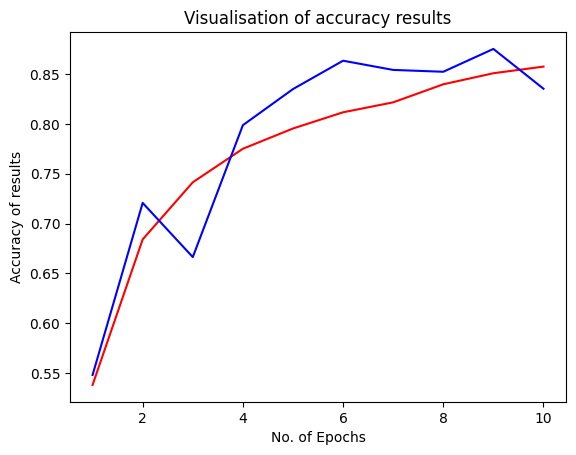

In [56]:
epochs=[i for i in range(1,11)]
plt.plot(epochs,training_history_n.history['accuracy'],color='red', label='Training accuracy')
plt.plot(epochs,training_history_n.history['val_accuracy'],color='blue',label='Validation accuracy')
plt.xlabel("No. of Epochs")
plt.ylabel("Accuracy of results")
plt.title("Visualisation of accuracy results")
plt.show()

In [57]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'DataSet2/data_split/validation',
    labels="inferred",
    label_mode="int",
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    interpolation="bilinear",
    follow_links=False
)


Found 2703 files belonging to 2 classes.


In [58]:
y_pred=model.predict(test_set)
y_pred,y_pred.shape

85/85 [==============================] - 58s 676ms/step


(array([[6.5497339e-01, 3.4502658e-01],
        [2.3316412e-01, 7.6683587e-01],
        [8.4092689e-01, 1.5907314e-01],
        ...,
        [7.4092889e-01, 2.5907111e-01],
        [2.8144490e-02, 9.7185552e-01],
        [4.2337957e-05, 9.9995768e-01]], dtype=float32),
 (2703, 2))

In [59]:
predicted_categories =tf.argmax(y_pred,axis=1)
y_pred,y_pred.shape

(array([[6.5497339e-01, 3.4502658e-01],
        [2.3316412e-01, 7.6683587e-01],
        [8.4092689e-01, 1.5907314e-01],
        ...,
        [7.4092889e-01, 2.5907111e-01],
        [2.8144490e-02, 9.7185552e-01],
        [4.2337957e-05, 9.9995768e-01]], dtype=float32),
 (2703, 2))

In [60]:
predicted_categories

<tf.Tensor: shape=(2703,), dtype=int64, numpy=array([0, 1, 0, ..., 0, 1, 1], dtype=int64)>

In [61]:
true_categories = tf.concat([y for x,y in test_set],axis=0)

In [62]:
true_categories

<tf.Tensor: shape=(2703,), dtype=int32, numpy=array([0, 0, 0, ..., 1, 1, 1])>

In [63]:
Y_true = true_categories  # No need for tf.argmax()
print(Y_true)


tf.Tensor([0 0 0 ... 1 1 1], shape=(2703,), dtype=int32)


In [64]:
print(true_categories.shape)  # Debugging step


(2703,)


In [65]:
from sklearn.metrics import classification_report , confusion_matrix

# Define class names (replace with your actual class labels)
class_name = ['healthy', 'unhealthy']  # Example: Modify based on your dataset

# Generate the classification report
print(classification_report(Y_true, predicted_categories, target_names=class_name))


              precision    recall  f1-score   support

     healthy       0.86      0.80      0.83      1369
   unhealthy       0.81      0.87      0.84      1334

    accuracy                           0.84      2703
   macro avg       0.84      0.84      0.84      2703
weighted avg       0.84      0.84      0.84      2703



In [66]:
cm= confusion_matrix(Y_true, predicted_categories)
cm

array([[1099,  270],
       [ 175, 1159]], dtype=int64)

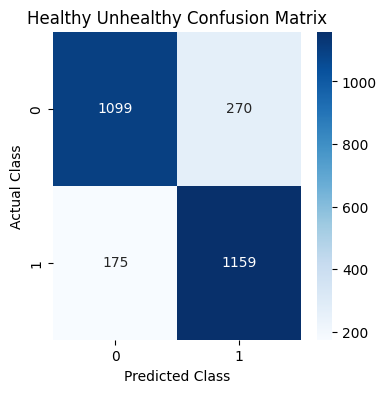

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Example usage:
# Assuming Y_true and predicted_categories are defined
cm = confusion_matrix(Y_true, predicted_categories)

# Plot heatmap
plt.figure(figsize=(4, 4))  # Create figure first
ax = sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')  # Save the axes to a variable

# Labels and title
ax.set_xlabel("Predicted Class")
ax.set_ylabel("Actual Class")
ax.set_title("Healthy Unhealthy Confusion Matrix")

plt.show()


In [68]:
model.save("trainnew_modell.keras")


In [69]:
model.save("trainnew_modell.h5")

In [70]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)


TensorFlow version: 2.10.0
